In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import polynomial
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sympy.physics.units import degree
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

### 数据集生成

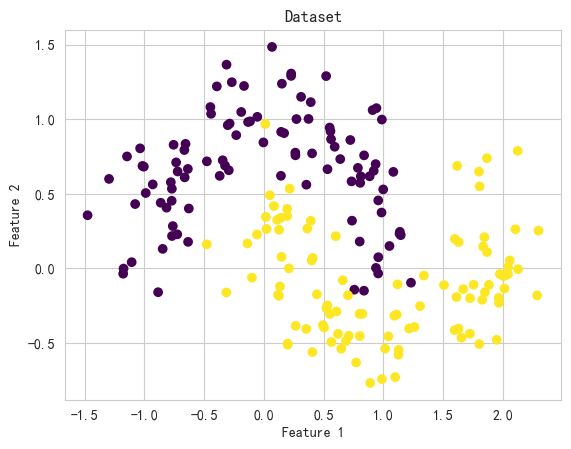

In [2]:
# 生成数据集
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# 可视化数据集
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### 特征衍生（数据增强）

In [3]:
# 建立包含多项式特征和逻辑回归的流水线
degree = 4  # 可自行调整
polynomial_logistic_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('log_reg', LogisticRegression(solver='lbfgs', max_iter=10000))
])

### 模型建立

In [4]:
polynomial_logistic_model.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=4)),
                ('log_reg', LogisticRegression(max_iter=10000))])

### 决策边界可视化

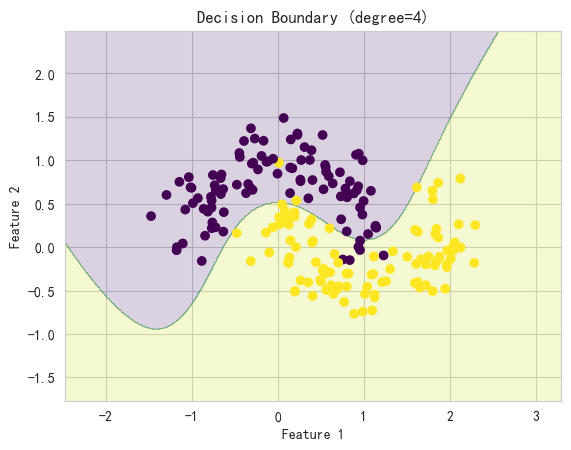

In [5]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.title('Decision Boundary (degree={})'.format(degree))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 绘制决策边界
plot_decision_boundary(polynomial_logistic_model, X, y)

### 【讨论一】改变特征衍生的特征数量（degree）

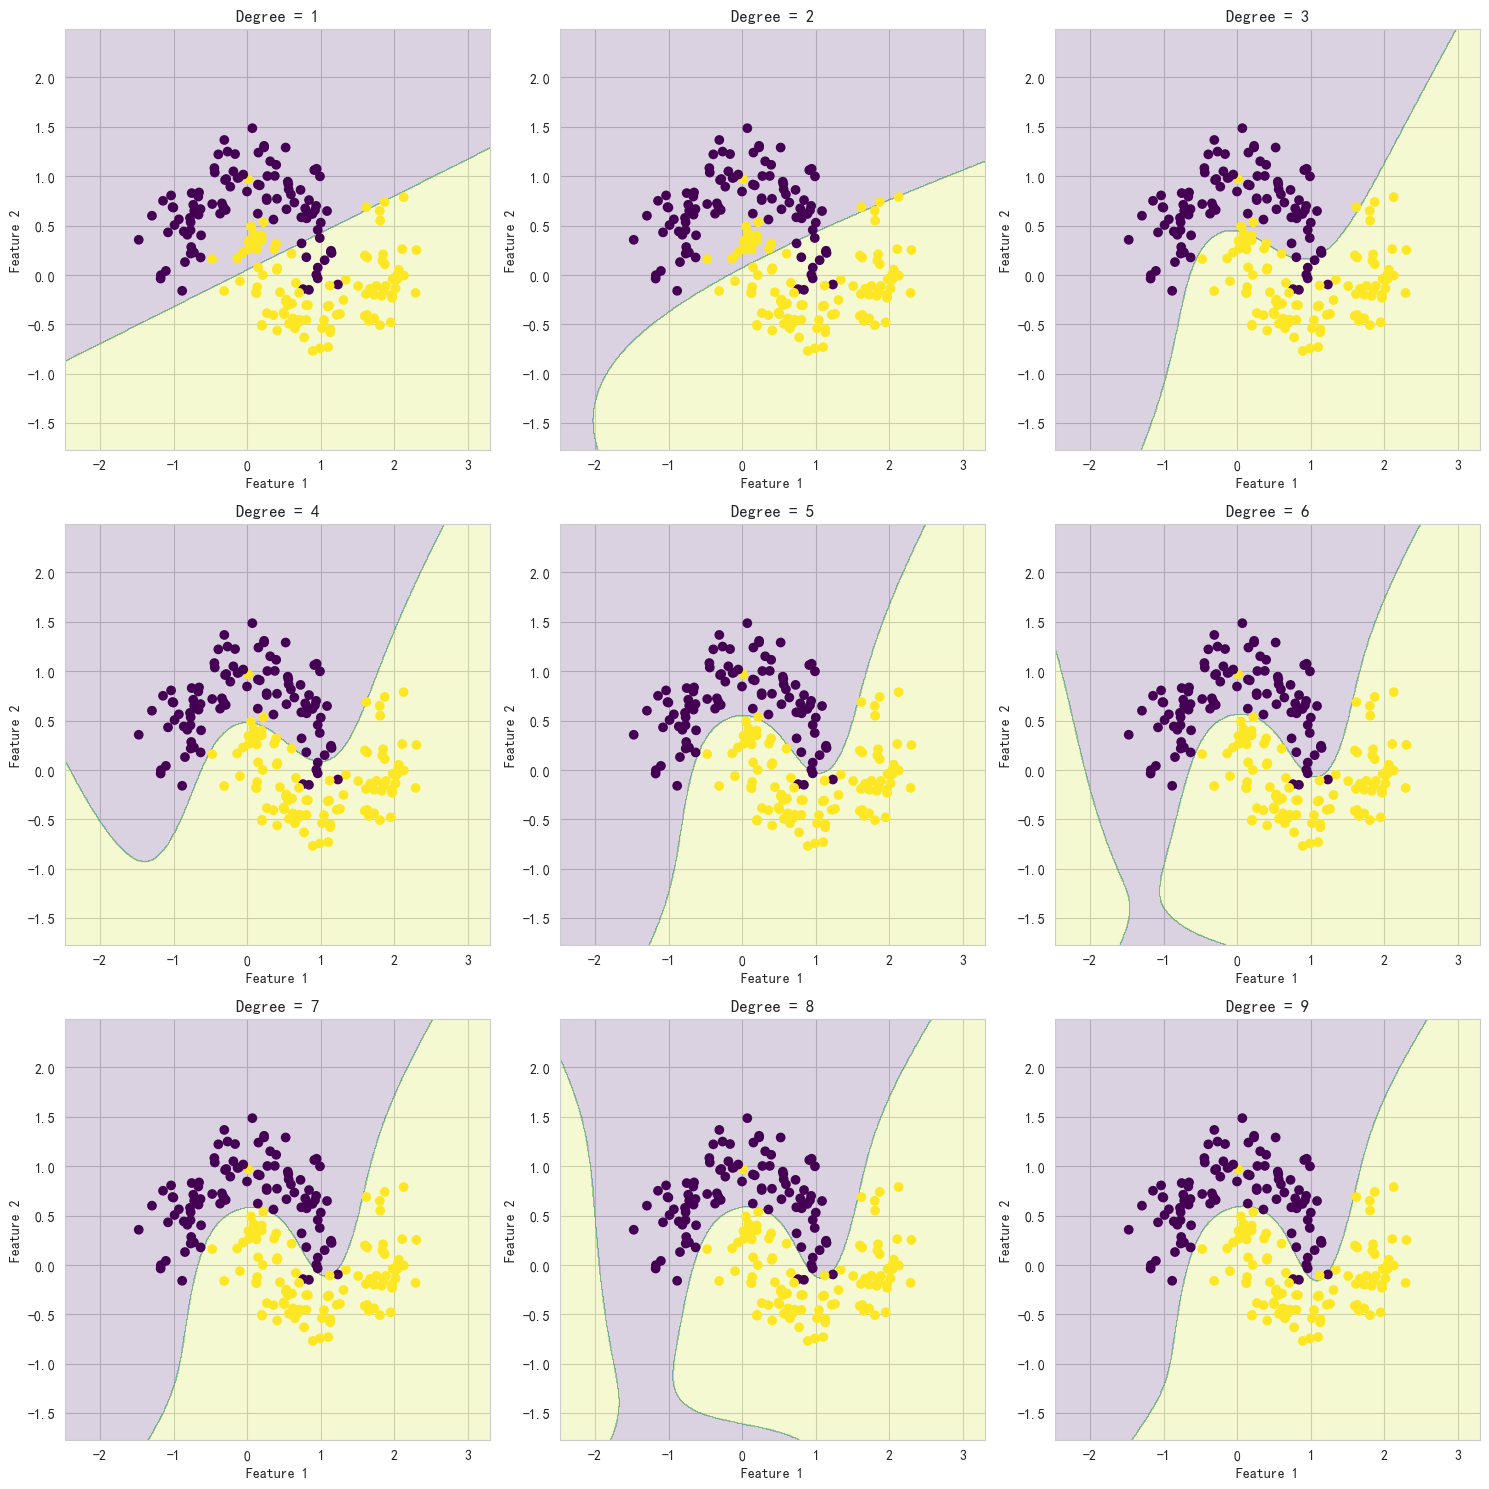

In [6]:
def plot_decision_boundary_new(ax, model, X, y, degree, image_name=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    ax.set_title(f'Degree = {degree}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    
    # Save the plot if image_name is provided
    if image_name:
        ax.figure.savefig(image_name)


# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

degrees = range(1, 10)

# Create a 3x3 grid for subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()  # Flatten the axes array for easy iteration

for i, degree in enumerate(degrees):
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('log_reg', LogisticRegression(solver='lbfgs', max_iter=10000))
    ])
    model.fit(X_train, y_train)
    
    # Plot decision boundary on the appropriate subplot
    plot_decision_boundary_new(axes[i], model, X, y, degree)

plt.tight_layout()
plt.show()

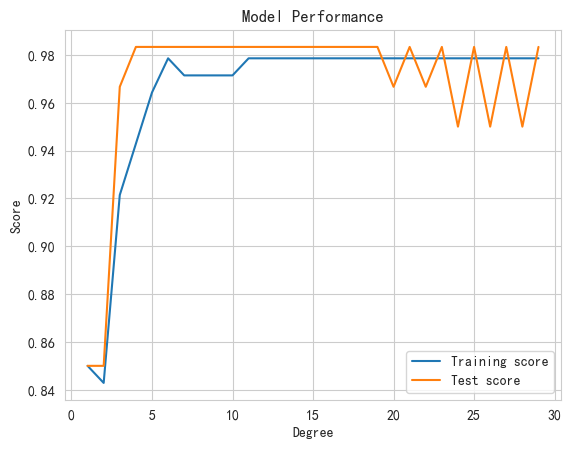

In [7]:
from sklearn.model_selection import train_test_split

degrees = range(1, 30)
train_scores = []
test_scores = []

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for degree in degrees:
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('log_reg', LogisticRegression(solver='lbfgs', max_iter=10000))
    ])
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

# 绘制训练集和测试集分数曲线
plt.plot(degrees, train_scores, label='Training score')
plt.plot(degrees, test_scores, label='Test score')
plt.xlabel('Degree')
plt.ylabel('Score')
plt.title('Model Performance')
plt.legend()
plt.show()


### 【讨论二】加入 'l1' 和 'l2' 正则项

选择一个过拟合的 degree，例如 degree=8。

No Regularization Training score: 1.0
No Regularization Test score: 0.95
L1 Regularization Training score: 0.6857142857142857
L1 Regularization Test score: 0.7666666666666667
L2 Regularization Training score: 0.9785714285714285
L2 Regularization Test score: 0.9833333333333333


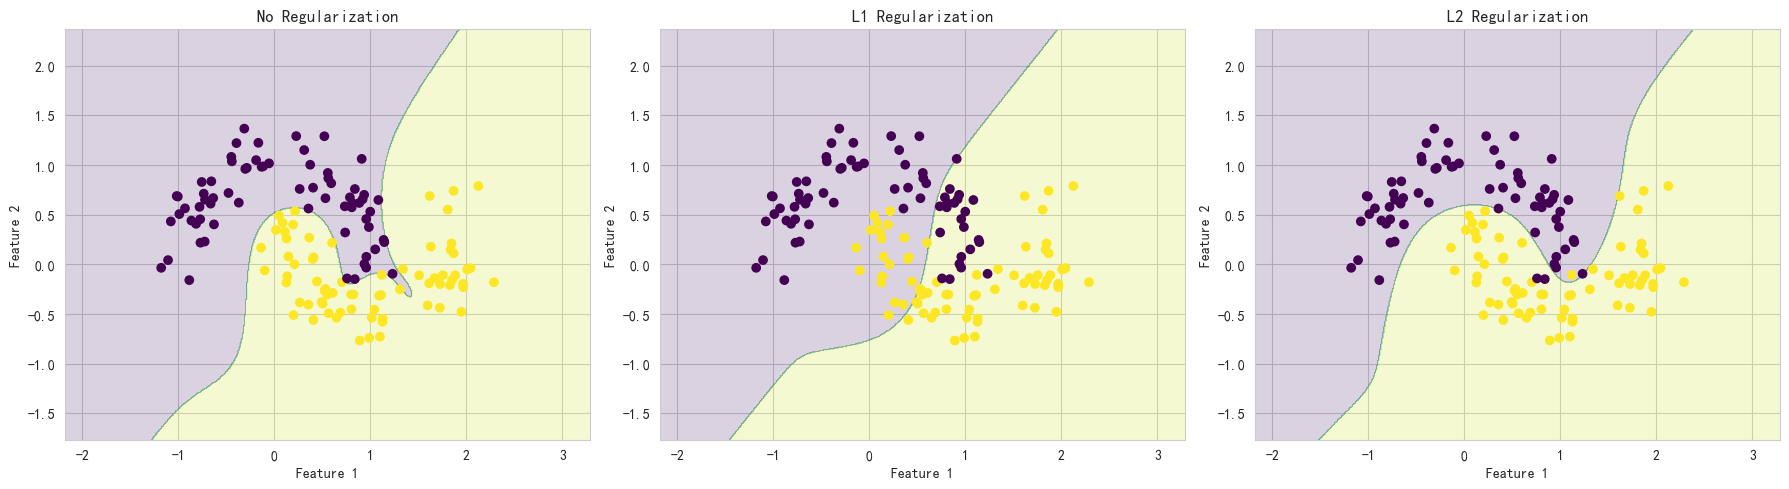

In [8]:
degree = 13

# Create a 1x3 grid for plotting the decision boundaries
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Baseline model without regularization
model_no_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('log_reg', LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000))
])
model_no_reg.fit(X_train, y_train)
print('No Regularization Training score:', model_no_reg.score(X_train, y_train))
print('No Regularization Test score:', model_no_reg.score(X_test, y_test))

# Plot decision boundary for the baseline model
plot_decision_boundary_new(axs[0], model_no_reg, X_train, y_train, degree)
axs[0].set_title("No Regularization")

# Model with L1 regularization
model_l1 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('log_reg', LogisticRegression(penalty='l1', solver='saga', max_iter=10000))
])
model_l1.fit(X_train, y_train)
print('L1 Regularization Training score:', model_l1.score(X_train, y_train))
print('L1 Regularization Test score:', model_l1.score(X_test, y_test))

# Plot decision boundary for the L1 regularized model
plot_decision_boundary_new(axs[1], model_l1, X_train, y_train, degree)
axs[1].set_title("L1 Regularization")

# Model with L2 regularization
model_l2 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('log_reg', LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000))
])
model_l2.fit(X_train, y_train)
print('L2 Regularization Training score:', model_l2.score(X_train, y_train))
print('L2 Regularization Test score:', model_l2.score(X_test, y_test))

# Plot decision boundary for the L2 regularized model
plot_decision_boundary_new(axs[2], model_l2, X_train, y_train, degree)
axs[2].set_title("L2 Regularization")

# Display the plot
plt.tight_layout()
plt.show()

1. **过拟合与正则化**  
   - **没有正则化的模型**（即基线模型）在训练集上达到了完美的分数（1.0），但在测试集上的表现稍差（0.95）。这种情况可能说明模型在训练集上过拟合，即它学到了数据中的噪声和一些不具泛化性的特征。
   - 过高的模型复杂度（如13阶多项式特征）容易导致过拟合，尤其是在数据量较小或特征不平衡的情况下。过拟合的模型通常对新数据的泛化能力较差。

2. **L2 正则化的优势**  
   - **L2正则化**引入了对模型复杂度的约束，惩罚权重值较大的特征。这可以有效降低过拟合程度，使得模型更加平滑、更加鲁棒，因而在测试集上表现更好（0.9833）。  
   - L2正则化通过限制模型的权重，使得模型专注于最重要的特征，忽略不必要的复杂模式。因此，L2正则化模型通常能在高维数据中保持较好的泛化能力，从而在测试集上获得更优的表现。

3. **L1 正则化的不足**  
   - **L1正则化**通过稀疏化权重（使一些特征权重变为零）来选择少数重要的特征。尽管在某些情况下（如特征数量非常大）L1正则化可以提升泛化性，但对于当前这种高度复杂的多项式特征，L1正则化可能过于激进，舍弃了过多的信息。
   - L1正则化可能导致模型欠拟合（如训练集分数为0.6857），因为它倾向于将一些特征权重设为零，可能削弱了模型的表现。这导致L1正则化模型在训练和测试集上的表现都低于无正则化和L2正则化模型。

总结来说，L2正则化在控制过拟合的同时保留了多项式特征中的重要信息，从而在测试集上获得更好的表现。而L1正则化由于更倾向于稀疏化权重，反而可能在这种复杂模型下导致欠拟合，最终表现不佳。

### 【讨论三】手动调整参数寻找最佳模型

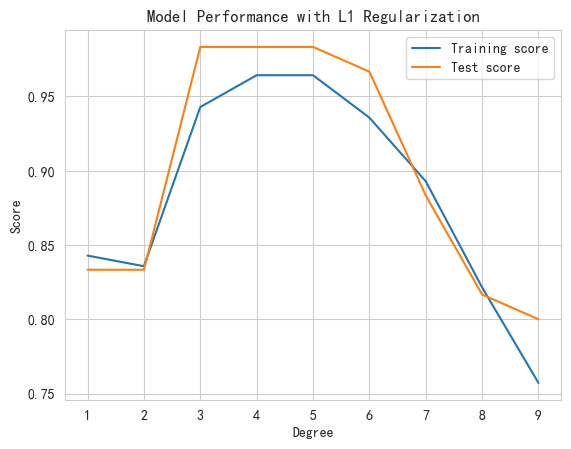

In [9]:
degrees = range(1, 10)
train_scores = []
test_scores = []

for degree in degrees:
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('log_reg', LogisticRegression(penalty='l1', solver='saga', max_iter=10000))
    ])
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

# 绘制分数曲线
plt.plot(degrees, train_scores, label='Training score')
plt.plot(degrees, test_scores, label='Test score')
plt.xlabel('Degree')
plt.ylabel('Score')
plt.title('Model Performance with L1 Regularization')
plt.legend()
plt.show()


在选定的 degree 和 'l1' 正则化下，调整正则项系数 C

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


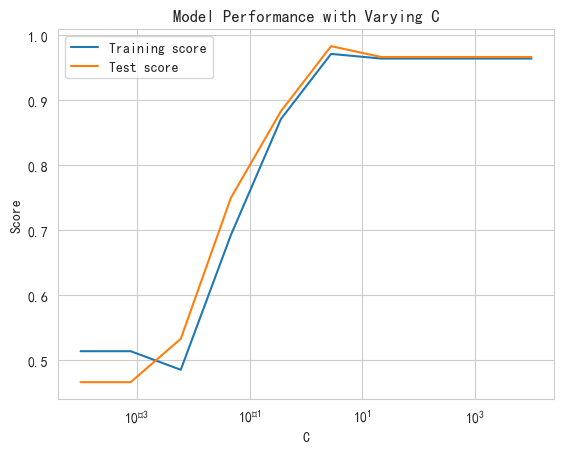

In [10]:
Cs = np.logspace(-4, 4, 10)
train_scores = []
test_scores = []

for C in Cs:
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=3)),
        ('log_reg', LogisticRegression(penalty='l1', solver='saga', C=C, max_iter=10000))
    ])
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

# 绘制分数曲线
plt.semilogx(Cs, train_scores, label='Training score')
plt.semilogx(Cs, test_scores, label='Test score')
plt.xlabel('C')
plt.ylabel('Score')
plt.title('Model Performance with Varying C')
plt.legend()
plt.show()
